# 4. Logistic Regression

### 공부 시간에 따른 자격증 시험 합격 가능성

In [2]:
import numpy as np # 고성능 수치 및 행렬 연산
import matplotlib.pyplot as plt # 데이터 시각화 (그래프 제작)
import pandas as pd # 표 데이터(표 데이터) 조작 및 분석

In [5]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values # [전체 행, 마지막 열]

### 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split # split: 4개의 데이터로 분리
# LogisticRegressionData.csv 파일의 데이터를 random_state로 섞고, 0.8만큼은 학습용으로 0.2만큼은 테스트용으로 분리하고 4개의 변수에 할당
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # train_test_split(): 리스트 형태로 반환

### 학습 (로지스틱 회귀 모델)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() # classifier: LogisticRegression 클래스의 객체
classifier.fit(X_train, y_train) # fit: 모델을 학습시키는 함수

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### 6시간 공부했을 때 예측?

In [14]:
classifier.predict([[6]]) # 바깥 대괄호: 데이터 덩어리가 몇 개인가? 안쪽 대괄호: 각 데이터에 대한 특성이 몇 개인가?
# 결과 1 : 합격할 것으로 예측

array([1])

In [15]:
classifier.predict_proba([[6]]) # 합격할 확률 출력
# 불합격 확률 14%, 합격 확률 86%

array([[0.141483, 0.858517]])

### 4시간 공부했을 때 예측?

In [16]:
classifier.predict([[4]])
# 결과 0 : 불합격할 것으로 예측

array([0])

In [17]:
classifier.predict_proba([[4]]) # 합격할 확률 출력
# 불합격 확률 62%, 합격 확률 38%

array([[0.62497682, 0.37502318]])

### 분류 결과 예측 (테스트 세트)

In [19]:
y_pred = classifier.predict(X_test)
y_pred # 예측 값

array([1, 0, 1, 1])

In [20]:
y_test # 실제 값 (테스트 세트)

array([1, 0, 1, 0])

In [21]:
X_test # 공부 시간 (테스트 세트)

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [22]:
classifier.score(X_test, y_test) # 모델 평가
# 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개 -> 3/4 = 0.75

0.75

### 데이터 시각화 (훈련 세트)

In [23]:
X_range = np.arange(min(X), max(X), 0.1) # X 의 최소값에서 최대값까지를 0.1 단위로 잘라서 데이터 생성
X_range

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29536\2673195321.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1) # X 의 최소값에서 최대값까지를 0.1 단위로 잘라서 데이터 생성


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [24]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_))) # y = mx + b
p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [25]:
p.shape

(1, 95)

In [26]:
X_range.shape

(95,)

In [27]:
p = p.reshape(-1) # 1차원 배열 형태로 변경
p.shape

(95,)

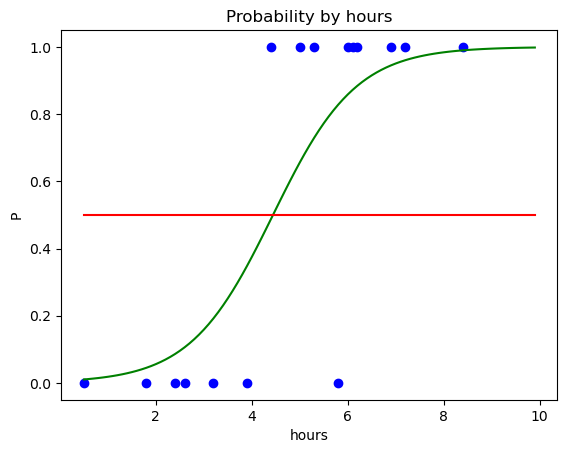

In [28]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만들기
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 데이터 시각화 (테스트 세트)

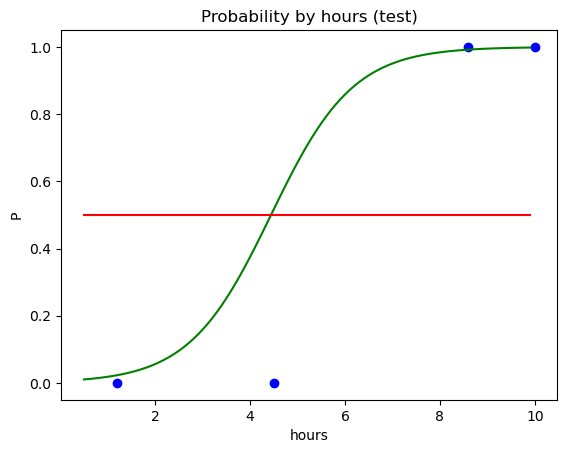

In [29]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range 개수만큼 0.5 로 가득찬 배열 만들기
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [30]:
classifier.predict_proba([[4.5]]) # 4.5 시간 공부했을 때 확률 (모델에서는 51% 확률로 합격 예측, 실제로는 불합격)

array([[0.48307854, 0.51692146]])

### 혼동 행렬 (Confusion Matrix)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# TRUE NEGATIVE (TN)       FALSE POSITIVE (FP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 불합격 (실제)             불합격 (실제)

# FALSE NEGATIVE (FN)      TRUE POSITIVE (TP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 합격 (실제)               합격 (실제)

array([[1, 1],
       [0, 2]])